In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [2]:
x_train = x_train/225
x_test = x_test/225

In [4]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [3]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
model = Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5,batch_size=64)

D:\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8873 - loss: 0.3898
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9828 - loss: 0.0546
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9883 - loss: 0.0365
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9912 - loss: 0.0281
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9940 - loss: 0.0208


In [12]:
accracy = model.evaluate(x_test,y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9867 - loss: 0.0435


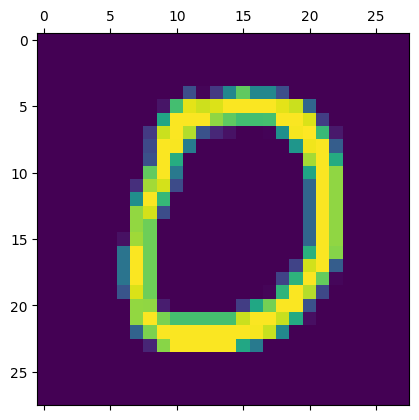

In [19]:
plt.matshow(x_test[10])

In [16]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
y_pred[0]

array([1.5170358e-10, 1.2864298e-08, 2.1899655e-08, 1.3426241e-08,
       1.2266201e-10, 3.2590531e-11, 2.5040374e-14, 1.0000000e+00,
       4.0390660e-11, 1.2752750e-08], dtype=float32)

In [20]:
np.argmax(y_pred[10])

np.int64(0)